In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import math
from matplotlib import pyplot as plt

C:\Users\sherryyang\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#import the s&p 500 adjusted return datasets, after deleting the companies with more than 50 null values
#there are 451 companies left
spx =pd.read_csv('spx_adjreturn.csv', index_col=0)

In [4]:
spx_std = spx.std()

In [5]:
spx_std =np.array(spx_std)

In [6]:
# correlation matrix
corr = spx.corr()

In [7]:
corr.head()

,A,AAL,AAP,AAPL,ABC,ABT,ACN,ADBE,ADI,ADM,...,XEL,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION
A,1.000000,0.241313,0.224045,0.338967,0.290061,0.489348,0.510383,0.449890,0.494996,0.345342,...,0.186550,0.360438,0.440464,0.410670,0.480107,0.390144,0.488349,0.388471,0.455145,0.481190
AAL,0.241313,1.000000,0.172459,0.159752,0.169518,0.231789,0.202034,0.211614,0.241366,0.159148,...,0.081671,0.221148,0.186293,0.118121,0.215680,0.185921,0.200757,0.202993,0.182511,0.262542
AAP,0.224045,0.172459,1.000000,0.136051,0.159154,0.260046,0.227071,0.177989,0.217637,0.214114,...,0.146380,0.184410,0.197119,0.208581,0.234837,0.194795,0.259620,0.255058,0.238392,0.268086
AAPL,0.338967,0.159752,0.136051,1.000000,0.164536,0.266171,0.299967,0.284794,0.381255,0.181457,...,0.100179,0.179263,0.267575,0.248110,0.258916,0.263340,0.268887,0.262548,0.288751,0.278419
ABC,0.290061,0.169518,0.159154,0.164536,1.000000,0.363972,0.261711,0.220370,0.221732,0.193637,...,0.100541,0.244613,0.188089,0.221438,0.305694,0.201924,0.217879,0.185667,0.266584,0.252543


In [8]:
#dataframe to matrix, prepare for eigenvector and eigenvalue calculation
corr_mat = corr.as_matrix()

In [9]:
#eigenvalues
eig_vals = np.linalg.eig(corr_mat)[0]
#eigenvectors
eig_vecs = np.linalg.eig(corr_mat)[1]

# PCA Analysis

In [10]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
139.9614790145257
25.32615484405662
12.428010687158569
7.627724580025198
7.082776659008694
6.080279104377702
5.594093344354964
4.615595591044261
3.8542025943509004
3.4263596511821732
3.1892874261124398
3.1294502105307114
2.756481593530173
2.6717595607417968
2.4174430863456586
2.27103773298963
2.1927418881807172
2.1149098383030935
2.0037997964052914
1.954304140179188
1.9466078914852205
1.8800593075423608
1.7920397440186293
1.759960360335682
1.7149804543796259
1.6716493418530076
1.6343496378623457
1.6046343623228418
1.587483612235852
1.5375153915631485
1.5249399470644813
1.497648516913017
1.466938472500262
1.4478106193950564
1.4255480096070903
1.410095612412863
1.3965260747554482
1.3839537634259702
1.3801533987853507
1.3545379225344705
1.3454517929162488
1.3334415194613263
1.321987366025082
1.2946953328048454
1.2587328775898694
1.2558557859605606
1.2464128330061883
1.2259520758279476
1.213452403101939
1.2044626348279632
1.1894373480904343
1.17966913290624

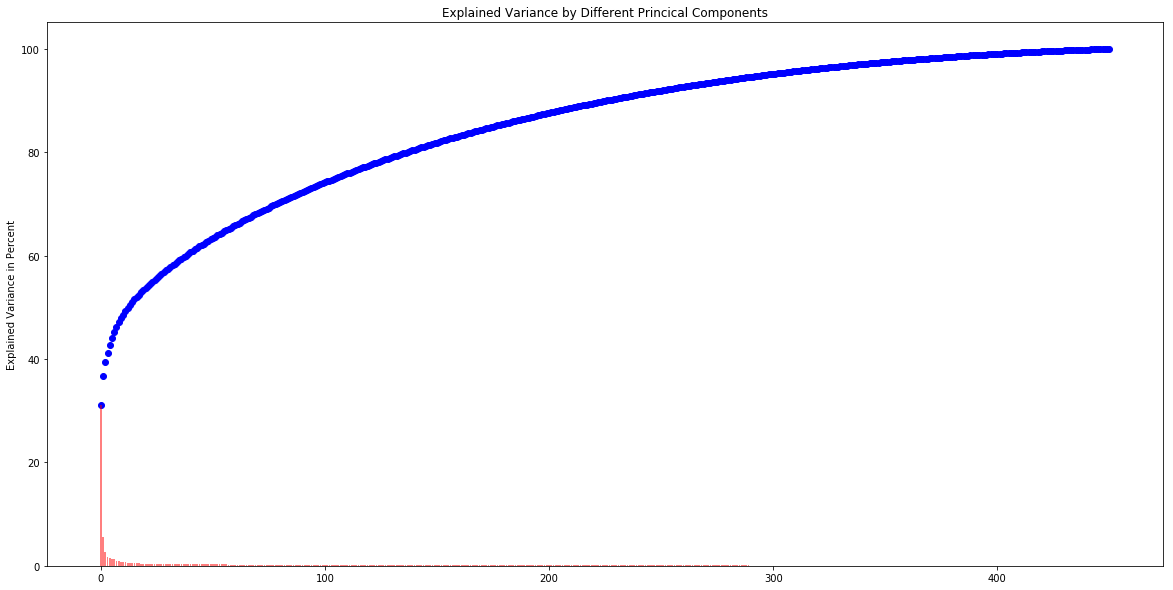

In [11]:
# Use explained variance to decide how many components to choose 
# The explained variance tells us how much information (variance) can be attributed to each of the principal components.
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.figure(figsize= (20,10))
plt.bar(range(len(eig_vals+1)), var_exp,align='center', alpha=0.5, color = 'r')
plt.scatter(range(len(eig_vals+1)), cum_var_exp,color = 'b')
plt.ylabel('Explained Variance in Percent')
plt.title('Explained Variance by Different Princical Components') 
plt.show()

# Compare $\frac{\Delta p}{p}$ and $\frac{\Delta spy}{spy}$

# $w_{i}^{(1)} = \frac{v_{i}^{(1)}}{\sigma_{i}} \frac{1}{\sqrt{\lambda_{i}}}$
$\theta_{i}^{(1)} = \frac{w_{i}^{(1)}}{\sum w_{j}^{(1)}}$ , 
$\frac{\Delta p_{t}}{p} = \sum_{i} \theta_{i} R_{it}$

In [12]:
#the first eigenvector
eigenvec_1 = eig_vecs[:,0]

In [13]:
#standard deviation
std_1 =  np.std(eigenvec_1)

In [14]:
w1 = eigenvec_1/spx_std *(1/math.sqrt(eig_vals[0]))

In [15]:
theta1 = w1/sum(w1)

In [16]:
# replace all null values in adjusted return data with 0
spx =spx.fillna(0)

In [17]:
spx = spx.astype(float)

In [18]:
spx_mat= spx.as_matrix()

In [19]:
dollar_one_norm_ret = np.matmul(spx_mat[1:],theta1)

In [20]:
dollar_one_norm_ret

array([-0.00412625,  0.00576463,  0.00109512, ...,  0.01023777,
        0.00142275, -0.00718928])

In [21]:
sy = dollar_one_norm_ret+1
np.prod(sy)

2.514503554886386

In [22]:
dollar_one_norm_ret.shape

(1509,)

# Stock SPY

In [23]:
spy =pd.read_csv('SPY.csv', index_col =[0])

In [24]:
spy_adjclose = spy['Adj Close'] 

In [25]:
spy_return = spy_adjclose.pct_change(1)

In [26]:
spy_return = spy_return.dropna()
spy_return_normlized = (spy_return-spy_return.mean())/spy_return.std()

In [27]:
pd.to_datetime(spx.index).values

array(['2012-02-21T00:00:00.000000000', '2012-02-22T00:00:00.000000000',
       '2012-02-23T00:00:00.000000000', ...,
       '2018-02-15T00:00:00.000000000', '2018-02-16T00:00:00.000000000',
       '2018-02-20T00:00:00.000000000'], dtype='datetime64[ns]')

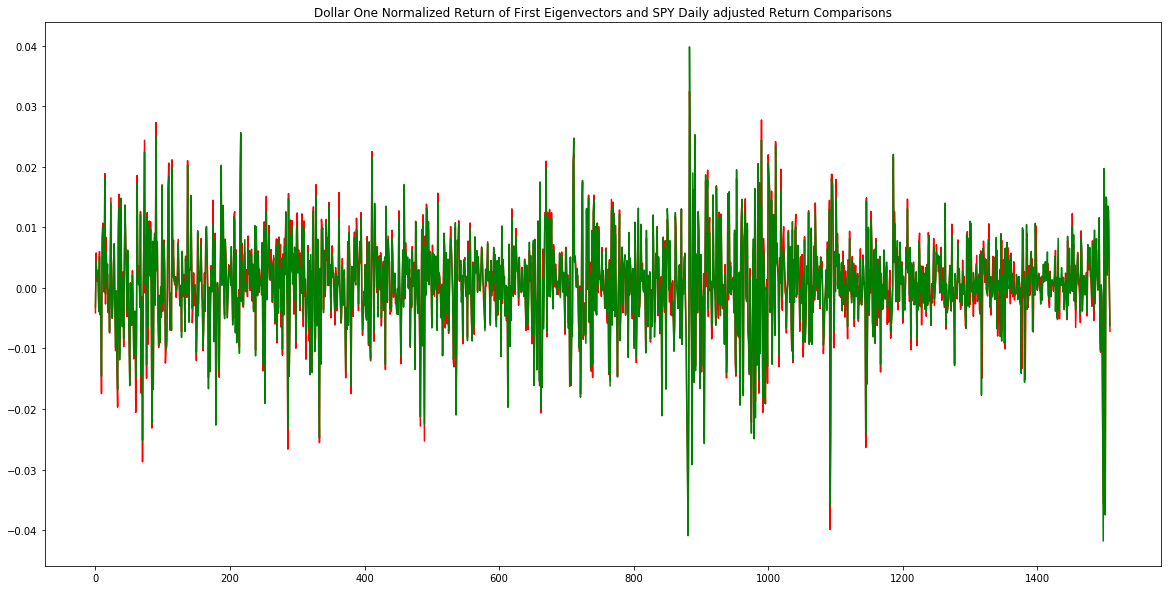

In [28]:
plt.figure(figsize= (20,10))
plt.plot(range(len(dollar_one_norm_ret)), dollar_one_norm_ret, color ='r' )
plt.plot(range(len(spy_return)),spy_return, color ='g' )
plt.title("Dollar One Normalized Return of First Eigenvectors and SPY Daily adjusted Return Comparisons" ) 
plt.show()

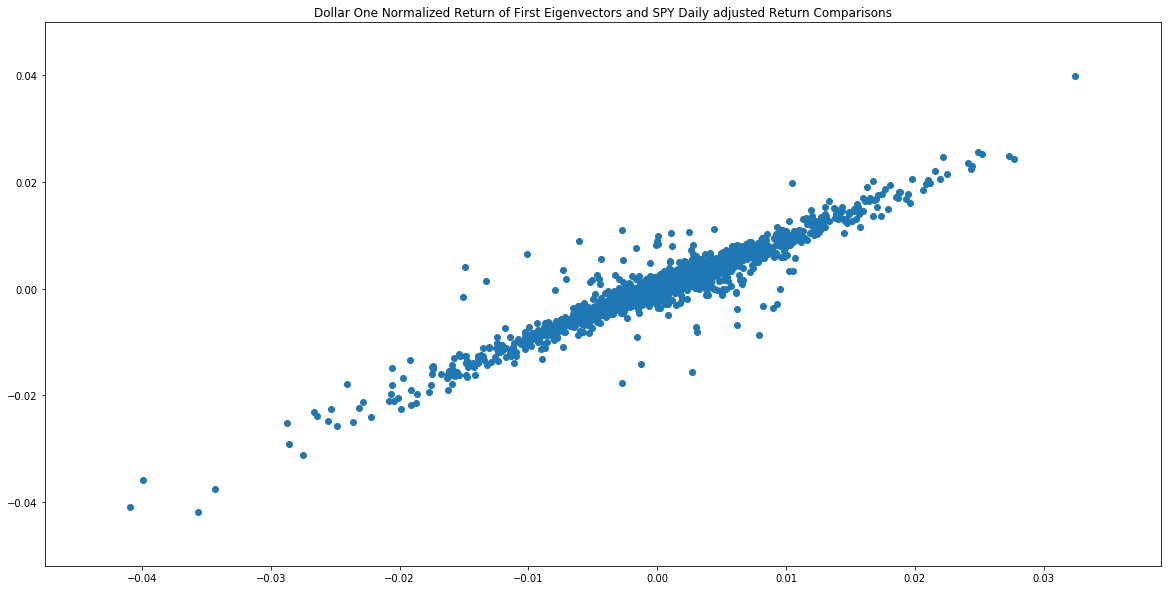

In [29]:
plt.figure(figsize= (20,10))
plt.scatter(dollar_one_norm_ret,spy_return )
plt.title("Dollar One Normalized Return of First Eigenvectors and SPY Daily adjusted Return Comparisons" )
plt.show()

In [30]:
np.corrcoef(dollar_one_norm_ret,spy_return)

array([[1.       , 0.9522158],
       [0.9522158, 1.       ]])

# Present sector $\alpha$ with second eigenvector and third eigenvector

In [31]:
companies = pd.read_csv('constituents.csv', index_col=[0])

In [32]:
companies = companies['Sector']

In [33]:
companies.head()

Symbol
MMM                Industrials
ABT                Health Care
ABBV               Health Care
ACN     Information Technology
ATVI    Information Technology
Name: Sector, dtype: object

In [34]:
#combine the correlation matrix data and company sectors dataset, then we can get the industry of every company belongs to
industry_corr = corr.join(companies, how ='inner')

In [35]:
len(industry_corr )

451

In [36]:
industry_corr['Sector'].unique()

array(['Health Care', 'Industrials', 'Consumer Discretionary',
       'Information Technology', 'Consumer Staples', 'Utilities',
       'Financials', 'Real Estate', 'Materials', 'Energy',
       'Telecommunications Services'], dtype=object)

In [37]:
#the second eigenvector
eigenvec_2 = eig_vecs[:,1]

In [38]:
w2 = eigenvec_2/(spx_std * math.sqrt(eig_vals[1]))

In [39]:
theta2 = w2/sum(w2)

In [40]:
#the third eigenvector
eigenvec_3 = eig_vecs[:,2]

In [41]:
w3 = eigenvec_3/spx_std *(1/math.sqrt(eig_vals[2]))

In [42]:
theta3 = w3/sum(w3)

In [43]:
industry =  pd.DataFrame(industry_corr['Sector'])

In [44]:
industry.head()

,Sector
A,Health Care
AAL,Industrials
AAP,Consumer Discretionary
AAPL,Information Technology
ABC,Health Care


In [45]:
industry['theta2'] = theta2

In [46]:
industry['theta3'] = theta3

In [48]:
industry.groupby('Sector')['theta2'].sum().sort_values()

Sector
Financials                    -0.381129
Energy                        -0.125967
Industrials                   -0.120798
Information Technology        -0.082952
Consumer Discretionary        -0.058554
Materials                     -0.043617
Telecommunications Services    0.025497
Health Care                    0.039900
Consumer Staples               0.382463
Real Estate                    0.500611
Utilities                      0.864547
Name: theta2, dtype: float64

In [49]:
industry.groupby('Sector')['theta3'].sum().sort_values()

Sector
Energy                        -4.257270
Utilities                     -2.991541
Materials                     -0.777676
Real Estate                   -0.344911
Industrials                   -0.336993
Telecommunications Services   -0.097558
Consumer Staples               0.931201
Financials                     1.468632
Information Technology         1.758007
Consumer Discretionary         2.063443
Health Care                    3.584666
Name: theta3, dtype: float64